In [19]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import random

from sklearn.datasets import make_blobs

style.use('ggplot')

In [46]:
class Mean_shift:
    def __init__(self, radius=None, radius_norm_step=100, tol=0.0001, max_iter=100000):
        self.radius = radius
        self.max_iter = max_iter
        self.radius_norm_step = radius_norm_step
        self.tol = tol
        
    def fit(self, data):
        
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step
        
        centroids = {}
            
        for i in range(len(data)):
            centroids[i] = data[i]
            
        weights = [i for i in range(self.radius_norm_step)][::-1]
        
        for k in range(self.max_iter):
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]         
                
                for featureset in data:
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.000000001

                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step - 1:
                        weight_index = self.radius_norm_step -1
                        
                    to_add = (weights[weight_index]**2) * [featureset]
                    in_bandwidth += to_add
                        
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(set(new_centroids)))
            
            to_pop = []
            for i in uniques:
                for j in uniques:
                    if j == i:
                        pass
                    #inf two points has distance less than radius, set to same centroid
                    elif np.linalg.norm(np.array(i)-np.array(j)) <= self.radius:
                        to_pop.append(j)
                        break
                        
            for i in to_pop:
                try: 
                    uniques.remove(i)
                except:
                    pass
            
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            optimized = True
            for i in centroids:
                if np.linalg.norm(centroids[i]-prev_centroids[i])>self.tol:
                    optimized = False
                    
                if not optimized:
                    break
                    
            if optimized:
                break
           
        self.centroids = centroids
        
        self.classifications = {}
        
        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        featureset = None
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)
            
            
        
    def predict(self, data):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [53]:
""" X = np.array([[1,2],
             [1.5,1.8],
             [5,8],
             [8,8],
             [1,0.6],
             [9,11],
             [8,2],
             [10,2],
             [9,3],]) """

X, y = make_blobs(n_samples=50, centers=3, n_features=2)

colors = 10*["g","r","c","b","k"]

#plt.scatter(X[:,0], X[:,1], s=150)
#plt.show()

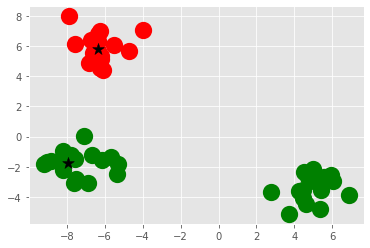

In [54]:
clf = Mean_shift()
clf.fit(X)

centroids = clf.centroids

for classification in clf.classifications:
    color=colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='o', color=color, s=150, linewidths=5)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)
    
plt.show()

<h2> Test with titanic data </h2>

In [ ]:
#convert all data to numeric
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_values = {}
        def convert_to_int(val):
            return text_digit_values[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_values:
                    text_digit_values[unique] = x
                    x+=1
                    
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

In [ ]:
df = pd.read_excel('titanic.xls')

#remove not interesting colunms 
df.drop(['name','body'], 1, inplace=True)

#Fill NaN with zero
df.fillna(0, inplace=True)

#data treatment, transforming all into numerical type
df = handle_non_numeric_data(df)

#set numbers in table into numeric type
#df.convert_objects(convert_numeric=True)
for column in df.columns.values:
    pd.to_numeric(df[column])
    
df.drop(['boat'], 1, inplace=True)

#all data except survived column
X = np.array(df.drop(['survived'],1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = K_means()
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y[i]:
        correct +=1
        
if correct/len(X) < 0.5:
    percent = 1 - correct/len(X)
else:
    percent = correct/len(X)
    
print('accuracy:', percent)